### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Metrics for model selection
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_recall_curve, precision_score, \
recall_score, confusion_matrix

# Importing Models -- LightBoost, Logistic, Randomforest
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import Imputer # For Missing Value Imputation

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

sns.set(style = 'white')

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from datetime import datetime
import lightgbm as lgbm
import warnings

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings

C:\Users\Akhil\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Importing data

In [2]:
order_prod_train = pd.read_csv('order_products__train.csv')
order_prior = pd.read_csv('order_products__prior.csv')
orders_df = pd.read_csv("orders.csv")
products_df = pd.read_csv("products.csv")
aisles_df = pd.read_csv("aisles.csv")
departments_df = pd.read_csv("departments.csv")

In [4]:
## Description of the data
def basic_description(df): 
    ''' This function gives the basic information about the dataset'''
    
    print('Total no of rows: {} and columns: {}  in the dataframe' .format(df.shape[0],df.shape[1]))
    print('\n')
    
    print('Columns in the dataset')
    print(df.columns.values)
    print('\n')
    
    print('Datatypes of all columns')
    print(df.dtypes)
    print('\n')
    
    print('Sample data')
    print(df.head(10))
    print('\n')
    
    print('Unique values in each column')
    print(df.nunique())
    print('\n')
    
    print('Total percentage of missing values in each column')
    try:
        k = df.isna().sum()*100/len(df).sort_values(ascending = False)
    except:
        k = df.isna().sum()*100/len(df)
    print(k)
    print('\n')
    
    print('Description of the continuous columns in the data')
    print(df.describe())
    

In [63]:
basic_description(orders_df)

Total no of rows: 3421083 and columns: 7  in the dataframe


Columns in the dataset
['order_id' 'user_id' 'eval_set' 'order_number' 'order_dow'
 'order_hour_of_day' 'days_since_prior_order']


Datatypes of all columns
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object


Sample data
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   
5   3367565        1    prior             6          2

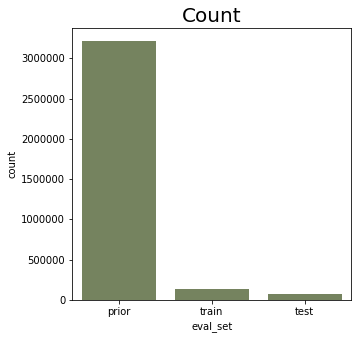

In [50]:
# bar plot
cnt_srs = orders_df.eval_set.value_counts()
plt.figure(figsize = (5,5))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha = 0.8,color = 'darkolivegreen')
plt.title('Count',fontsize = 20)
plt.xlabel('eval_set',fontsize = 10)
plt.ylabel('count',fontsize = 10)
plt.show()

In [34]:
# Unique count for users
def get_unique_count(x):
    return len(np.unique(x))

orders_df.groupby(['eval_set'])['user_id'].aggregate(get_unique_count)

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

Text(0.5,1,'Random')

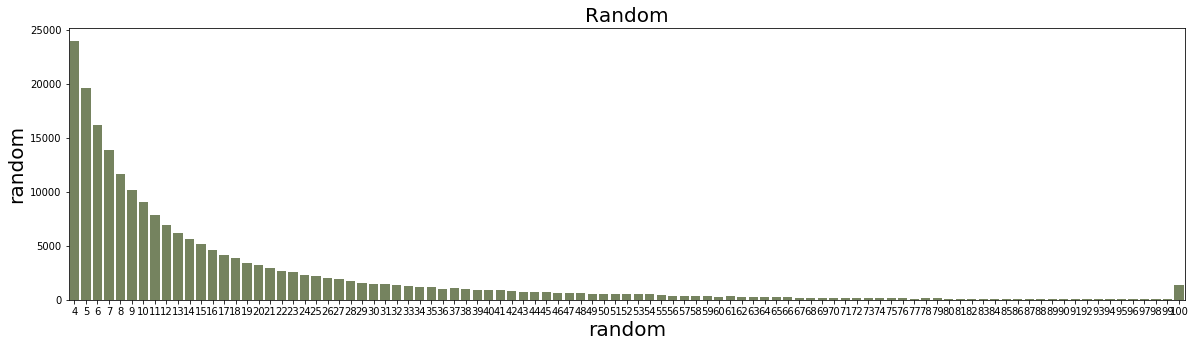

In [49]:
# Barplot 2
cnt_srs = orders_df.groupby('user_id')['order_number'].max().reset_index()
cnt_srs = cnt_srs['order_number'].value_counts()

plt.figure(figsize = (20,5))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha = 0.8,color = 'darkolivegreen')
plt.xlabel('random',fontsize = 20)
plt.ylabel('random',fontsize = 20)
plt.title('Random', fontsize = 20)

Text(0.5,1,'Random')

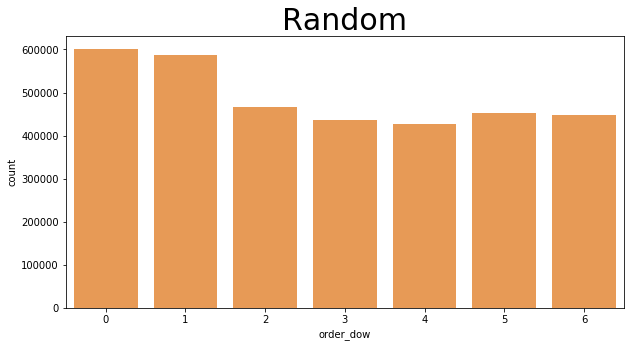

In [74]:
# Countplot
plt.figure(figsize = (10,5))
sns.countplot(x = 'order_dow',data = orders_df,alpha = 0.8,color = color[1])
plt.title('Random', fontsize= 30)

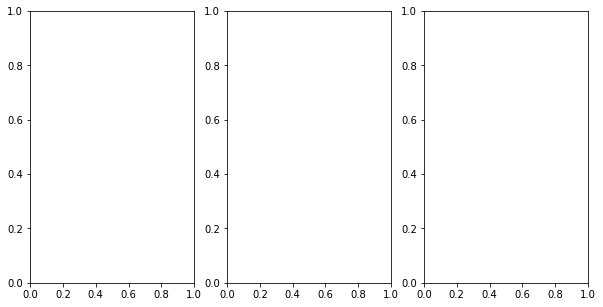

In [83]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows = 1 , ncols = 3, figsize=(10,5))

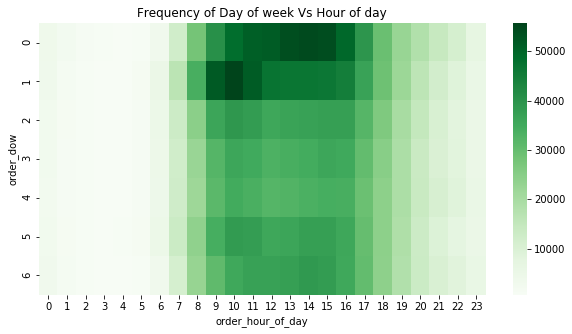

In [101]:
# Heat map
grouped_df = orders_df.groupby(['order_dow','order_hour_of_day'])['order_number'].aggregate('count').reset_index()
grouped_df_pivot = grouped_df.pivot('order_dow','order_hour_of_day','order_number')

plt.figure(figsize = (10,5))
sns.heatmap(grouped_df_pivot,cmap = 'Greens')
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [104]:
# sum
order_prior.reordered.sum() / order_prior.shape[0]

0.5896974667922161

In [ ]:
# Pointplot
plt.figure(figsize=(12,8))
sns.pointplot(grouped_df['department'].values, grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [109]:
# histogram
app_train['DAYS_EMPLOYED'].hist()
plt.title('Days Employed Histogram')

# histogram in sns
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

In [ ]:
# Correlation
# Include a column if you want to run against one column vs all columns
correlations = app_train.corr()['TARGET'].sort_values(ascending = False)

In [ ]:
# Scatterplot
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
ax1.scatter(predictions_mlr,residuals_mlr,c = 'b',alpha = 0.5)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residual plot - MLR')
    
ax2.scatter(predictions_h,residuals_h,c = 'g',alpha = 0.5)
ax2.set_title('Residual plot - Huber')
ax2.set_xlabel('Fitted Values')
ax2.set_ylabel('Residuals')

In [ ]:
# Capping outliers
ulimit = np.percentile(train_df.logerror.values,99)
llimit = np.percentile(train_df.logerror.values,1)
train_df['logerror'].ix[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].ix[train_df['logerror']<llimit] = llimit

In [ ]:
# Removing missing values
data.dropna(inplace = True)

In [ ]:
from sklearn.preprocessing import Imputer # Another imputation package is fancyimpute
# Impute with median values
imputer = Imputer(strategy = 'median') # Other strategy are 'mean', 'most_frequent'. axis = 0 means rows
poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features) #fit_transform automatically fits and transforms the data
poly_features_test = imputer.transform(poly_features_test) # just transform on test data

In [ ]:
# horizontal barplot
width = 0.9
fig, ax = plt.subplots(figsize = (12,18))
rects = ax.barh(ind, missing_df.missing_count.values, color = 'blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation = 'horizontal')
ax.set_xlable('Count of missing values')
ax.set_title('random')
plt.show()

In [ ]:
# lat long plot
plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

In [ ]:
# merge
train_df = pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.head()

In [ ]:
# calculating the count of continuous and categorical variables
pd.options.display.max_rows = 65

dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]


dtype_df.groupby("Column Type").aggregate('count').reset_index()

In [ ]:
# missing value columns with counts and ratios of missing values
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_df.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.999]

In [ ]:
# mean imputation
mean_values = train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values, inplace=True)

In [ ]:
# Correlation calculation and horizontal bar graph
# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [ ]:
# variables with high correlation values
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
# Correlation heat map

### Modelling

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from datetime import datetime
import lightgbm as lgbm
import warnings

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings

customerID           
value              No        Yes
variable                        
Dependents  70.041176  29.958824
Partner     51.696720  48.303280

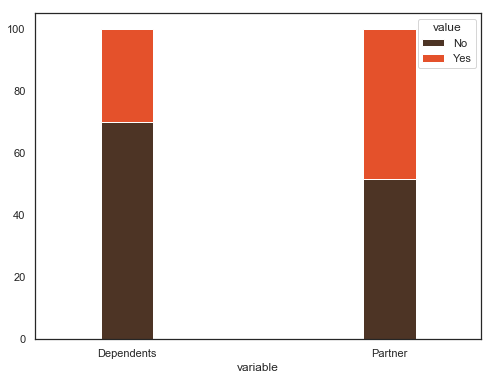

In [17]:
df.head()
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df2.head()
df3 = df2.groupby(['variable','value']).count().unstack()
df3.head()
df3*100/len(df)
df3 = df3*100/len(df)

colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

# ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_ylabel('% Customers',size = 14)
# ax.set_xlabel('')
# ax.set_title('% Customers with dependents and partners',size = 14)
# ax.legend(loc = 'center',prop={'size':14})

# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy() 
#     ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
#                 color = 'white',
#                weight = 'bold',
#                size = 14)
df3.loc[:,'customerID']
df3

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
## Dummy encoding
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,56.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,53.85,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,45,42.30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,70.70,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


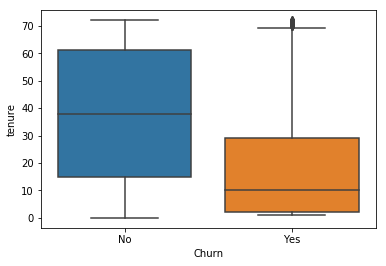

In [10]:
# box plot
sns.boxplot(x = df.Churn, y = df.tenure)

In [7]:
# Scaling the data
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [8]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size = 0.3)

In [21]:
# Model performance function
def model_performance(model) : 
    #Conf matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                    y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto', textfont=dict(color='black'),
                    orientation = 'h', opacity = 1, marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #Roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_score) , 3)
    fpr, tpr, t = roc_curve(y_test, y_score)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_score)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
    #Feature importance
    coefficients  = pd.DataFrame(eval(model).feature_importances_)
    column_data   = pd.DataFrame(list(data))
    coef_sumry    = (pd.merge(coefficients,column_data,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry    = coef_sumry.sort_values(by = "coefficients",ascending = False)
    coef_sumry = coef_sumry[coef_sumry["coefficients"] !=0]
    trace6 = go.Bar(x = coef_sumry["features"],y = coef_sumry["coefficients"],
                    name = "coefficients", 
                    marker = dict(color = coef_sumry["coefficients"],
                                  colorscale = "Viridis",
                                  line = dict(width = .6,color = "black")))
    
    #Cumulative gain
    pos = pd.get_dummies(y_test).as_matrix()
    pos = pos[:,1] 
    npos = np.sum(pos)
    index = np.argsort(y_score) 
    index = index[::-1] 
    sort_pos = pos[index]
    #cumulative sum
    cpos = np.cumsum(sort_pos) 
    #recall
    recall = cpos/npos 
    #size obs test
    n = y_test.shape[0] 
    size = np.arange(start=1,stop=369,step=1) 
    #proportion
    size = size / n 
    #plots
    model = model
    trace7 = go.Scatter(x = size,y = recall,
                        line = dict(color = ('gold'),width = 2), fill='tozeroy') 
    
    #Subplots
    fig = tls.make_subplots(rows=4, cols=2, print_grid=False,
                          specs=[[{}, {}], 
                                 [{}, {}],
                                 [{'colspan': 2}, None],
                                 [{'colspan': 2}, None]],
                          subplot_titles=('Confusion Matrix',
                                          'Metrics',
                                          'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                          'Precision - Recall curve',
                                          'Cumulative gains curve',
                                          'Feature importance'
                                          ))
    
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    fig.append_trace(trace6,4,1)
    fig.append_trace(trace7,3,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = False, height = 1500,width = 830,
                        plot_bgcolor = 'black',
                        paper_bgcolor = 'black',
                        margin = dict(b = 195), font=dict(color='white'))
    fig["layout"]["xaxis1"].update(color = 'white')
    fig["layout"]["yaxis1"].update(color = 'white')
    fig["layout"]["xaxis2"].update((dict(range=[0, 1], color = 'white')))
    fig["layout"]["yaxis2"].update(color = 'white')
    fig["layout"]["xaxis3"].update(dict(title = "false positive rate"), color = 'white')
    fig["layout"]["yaxis3"].update(dict(title = "true positive rate"),color = 'white')
    fig["layout"]["xaxis4"].update(dict(title = "recall"), range = [0,1.05],color = 'white')
    fig["layout"]["yaxis4"].update(dict(title = "precision"), range = [0,1.05],color = 'white')
    fig["layout"]["xaxis5"].update(dict(title = "Percentage contacted"),color = 'white')
    fig["layout"]["yaxis5"].update(dict(title = "Percentage positive targeted"),color = 'white')
    fig["layout"]["xaxis6"].update(color = 'white')
    fig["layout"]["yaxis6"].update(color = 'white')
    for i in fig['layout']['annotations']:
        i['font'] = titlefont=dict(color='white', size = 14)
    py.iplot(fig)

In [23]:
# Cross valiation metrics Need to check this

def cross_val_metrics(model):
    scores = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    for sc in scores:
        scores = cross_val_score(model, X, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

### Models


In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from datetime import datetime
import lightgbm as lgbm
import warnings

from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings

In [ ]:
#1. Logistic regression
# Running logistic regression model
from sklearn.linear_model import LogisticRegression

lgr_clf = LogisticRegression()
lgr_clf.fit(X_train, y_train)
y_pred = lgr_clf.predict(X_test)
y_score = lgr_clf.predict_proba(X_test)[:,1]

model_performance('lgr_clf')


In [ ]:
# Checking variation inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# # For each X, calculate VIF and save in dataframe
# vif = pd.DataFrame()
# vif['VIF Factor'] = [variance_inflation_factor(X_train.values, i) for i in range()]

In [ ]:
vif.round(1).replace(np.inf,np.nan).dropna()

In [ ]:
# 2. 

continue with correlation heat map and other things tomorrow
Things to do
1. Go through the codes in austin bike sharing, assignments and mercedes benz
2. Deepayan's notes
3. Practice with one dataset in a timed manner
4. write the codes for models in the cheat sheet
5. write codes for hypothesis testing in python
